# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction

I have selected the dataset of TMDb movie data for analysis, it is talking about movies from 1960 to 2015 and it has many field like the orginal tittle of the movies,the cast, the revenue,the budget, the vote count ,the vote average,the genres and the runtime of the movies.
there are questions want to be describe and here the question which want describe:
1. Which genres are the most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Which movie had high revenue and movie had low revenue?
4. Which movie consumed high budget and movie that consumed low budget?
5. Which movie has the shortest runtime and which movie has the longest runtime?
6. who is the director who made more movies ?and how many movies?
7. Which movie has the highest vote and which movie has the lowest vote?
8. Which year has highest numbers of movies and which movie year has highest numbers of movies?
9. Is there strong relationship between fields of the datadet?

In [1]:
#packages used in this analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data 
df= pd.read_csv('tmdb-movies.csv')
#access,print and show some of lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#define function will be used to convert runtime values which is minutes to hours and minutes 
def time_convert(minutes):
    hours=minutes//60 
    minuts=minutes%60
    total_time= str(hours)+'h'+':'+str(minuts)+'m'
    return total_time

In [4]:
#describe the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# get some info about data and its data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### issues to be cleaned 
1. some columns need to be removed as they will not affect in the analysis
2. the runtime of some movies are equal to zero  which is not good way for even short movies according to https://www.raindance.org/7-rules-for-writing-short-films/ 
3. remove records with zero budgets
4. drop rows which don't have information which help in analysis 
5. runtime column to be in time duration format

### Data Cleaning 

##### here the issues will be cleaned in speacfic way , the cleanong process is consists of 3 parts : define ,code and test first of all we will make copy of dataframe to perform the cleaning procesess on it 

In [6]:
#take copy from dataframe 
movie= df.copy()

###### define
 1. some columns need to be removed as they will not affect in the analysis 

##### code 

In [7]:
#remove the unused columns 
movie.drop(['id','imdb_id','homepage','overview','keywords','tagline','popularity','release_date','production_companies'],axis=1,inplace=True) 

##### test

In [8]:
#test the changes that applies after dropping rows
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1018.8+ KB


##### define
2. the runtime of some movies are equal to zero  which is not good way for even short movies according to https://www.raindance.org/7-rules-for-writing-short-films/ 

##### code

In [9]:
# condition is reversed so when we drop rows based on condition by Negation of negation(~cond) to drop zero runtimes
cond=movie['runtime'] != 0
movie.drop(movie[~cond].index,inplace=True)

##### test

In [10]:
#test the changes that applies after dropping rows
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 12 columns):
budget            10835 non-null int64
revenue           10835 non-null int64
original_title    10835 non-null object
cast              10759 non-null object
director          10793 non-null object
runtime           10835 non-null int64
genres            10813 non-null object
vote_count        10835 non-null int64
vote_average      10835 non-null float64
release_year      10835 non-null int64
budget_adj        10835 non-null float64
revenue_adj       10835 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


##### define
3. remove records with zero budgets 

##### code

In [11]:
# condition is reversed so when we drop rows based on condition by Negation of negation(~cond) to drop zero budgets
cond=movie['budget'] != 0
movie.drop(movie[~cond].index,inplace=True)

##### test

In [12]:
#test the changes that applies after dropping rows
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 10865
Data columns (total 12 columns):
budget            5167 non-null int64
revenue           5167 non-null int64
original_title    5167 non-null object
cast              5156 non-null object
director          5163 non-null object
runtime           5167 non-null int64
genres            5166 non-null object
vote_count        5167 non-null int64
vote_average      5167 non-null float64
release_year      5167 non-null int64
budget_adj        5167 non-null float64
revenue_adj       5167 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 524.8+ KB


##### define
4. drop rows which don't have important information which help in analysis 

##### code 

In [13]:
#drop missing values
movie.dropna(inplace=True) 

##### test

In [14]:
#test 
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 10865
Data columns (total 12 columns):
budget            5151 non-null int64
revenue           5151 non-null int64
original_title    5151 non-null object
cast              5151 non-null object
director          5151 non-null object
runtime           5151 non-null int64
genres            5151 non-null object
vote_count        5151 non-null int64
vote_average      5151 non-null float64
release_year      5151 non-null int64
budget_adj        5151 non-null float64
revenue_adj       5151 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 523.1+ KB


##### define
5. runtime column to be in time duration format

##### code

In [15]:
#change runtime to be in hour and min time format 
movie['runtime']=movie['runtime'].apply(time_convert)

##### test

In [16]:
print(movie['runtime'])

0         2h:4m
1         2h:0m
2        1h:59m
3        2h:16m
4        2h:17m
5        2h:36m
6         2h:5m
7        2h:21m
8        1h:31m
9        1h:34m
10       2h:28m
11        2h:4m
12       1h:48m
13       1h:45m
14       2h:21m
15       2h:47m
16       1h:49m
17       1h:55m
18       1h:52m
19       2h:16m
20       2h:10m
21        2h:3m
22       1h:54m
23        2h:5m
24       2h:10m
25       2h:11m
26       1h:55m
27       2h:10m
28        2h:8m
29       2h:12m
          ...  
10772     2h:3m
10775    2h:20m
10777    2h:25m
10778    1h:58m
10779    1h:50m
10780    1h:55m
10781    1h:34m
10782    2h:14m
10784    1h:41m
10788    2h:14m
10790    1h:44m
10791    1h:47m
10793    1h:28m
10795     2h:5m
10800     2h:0m
10802    1h:54m
10810    1h:27m
10815     2h:7m
10820    0h:26m
10822    2h:11m
10824    2h:54m
10827    1h:45m
10828     2h:8m
10829     2h:0m
10832    1h:45m
10835     3h:2m
10841    1h:22m
10848    1h:40m
10855    1h:30m
10865    1h:14m
Name: runtime, Length: 5

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are the most popular from year to year?)

In [17]:
# relation between release year and the mode of genres 
most_popular_genres=movie.groupby('release_year').agg({'genres': lambda x: pd.Series.mode(x)[0]})
most_popular_genres

,genres
release_year,
1960,Action|Adventure|Western
1961,Drama
1962,Drama
1963,Action|Drama|History
1964,Adventure|Action|Thriller
1965,Action|Adventure|Comedy
1966,Drama
1967,Crime|Drama
1968,Action|Crime|Drama|Thriller


##### From the above figure , the most popular genres from year to year is appeared and for overall the most genres in this case study is Drama

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

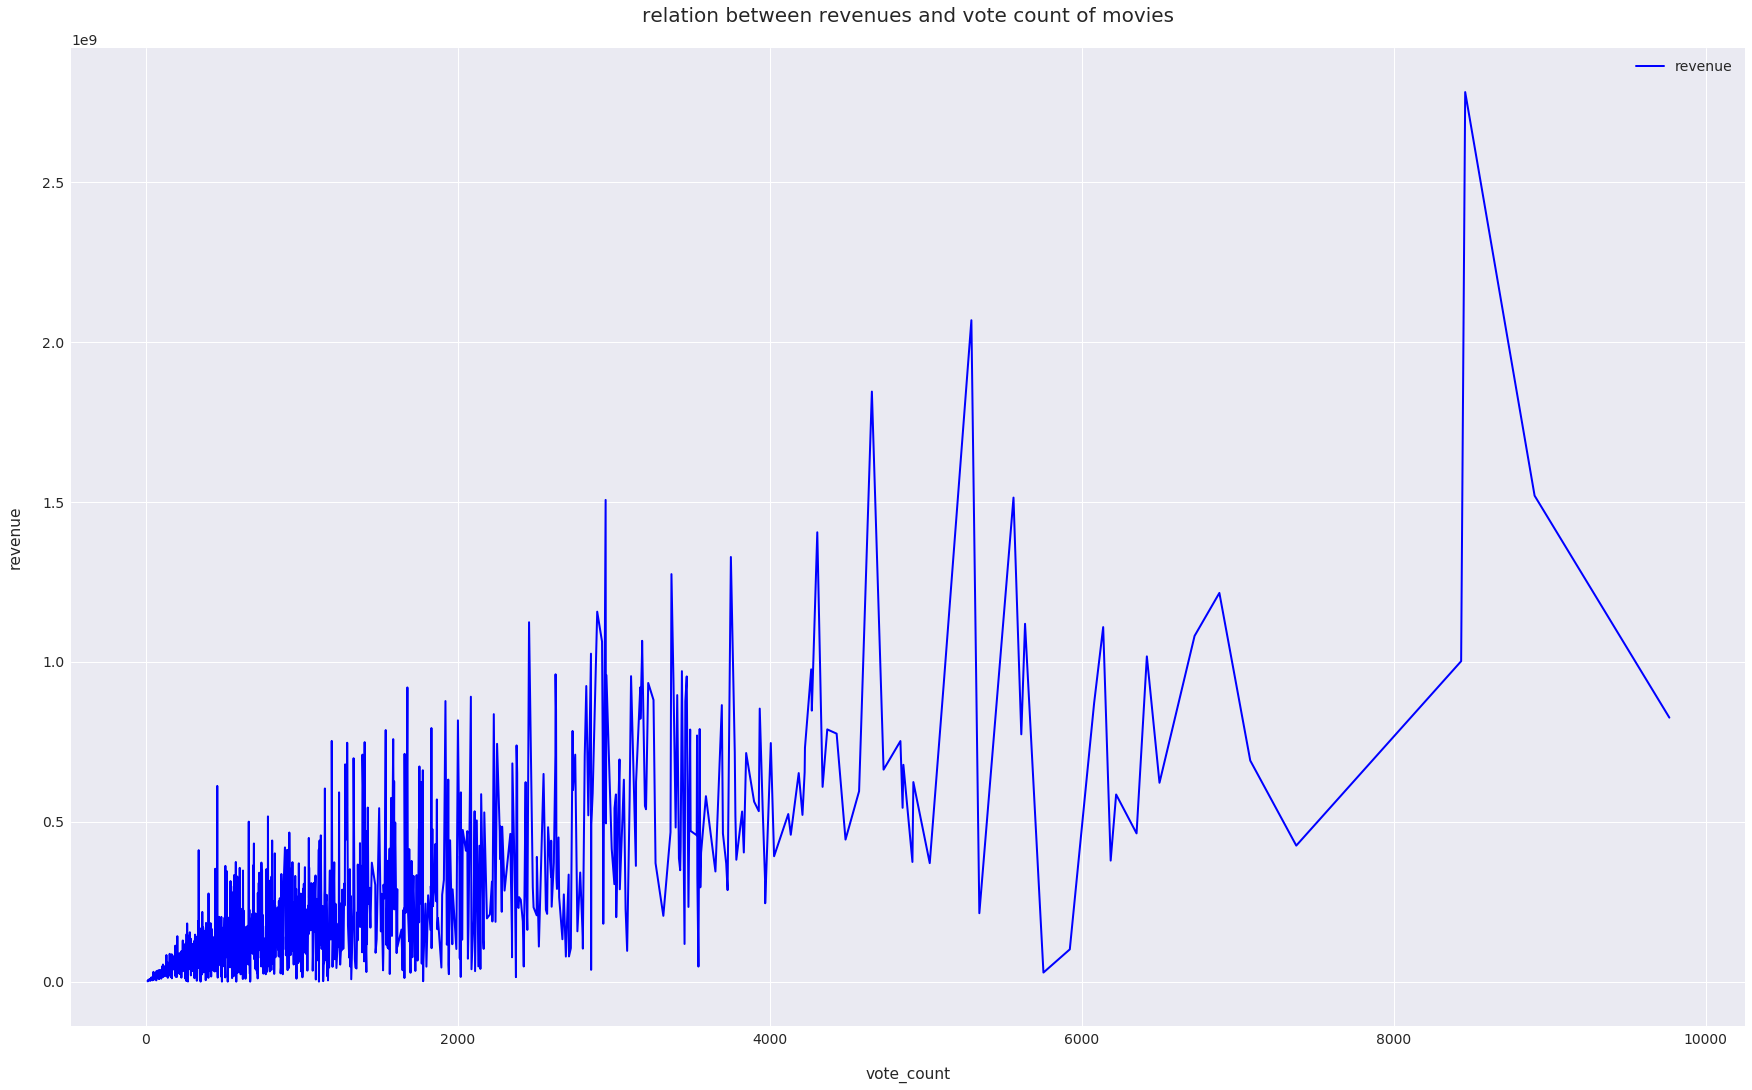

In [18]:
#relation between revenue and vote count 
avg_budget_vs_revenue =movie.groupby('vote_count').revenue.mean()   
sns.set(font_scale=1.4)
avg_budget_vs_revenue.plot(figsize=(30,18), linewidth=2, color='blue')
plt.xlabel("vote_count", labelpad=20)
plt.ylabel("revenue", labelpad=20)
plt.title("relation between revenues and vote count of movies", y=1.02, fontsize=20)
plt.legend()
plt.show();

##### From the (relation between mean (average)revenues and vote count of movies)figure , it shows that the movie with high vote counts could be an indicator of high average revenu.

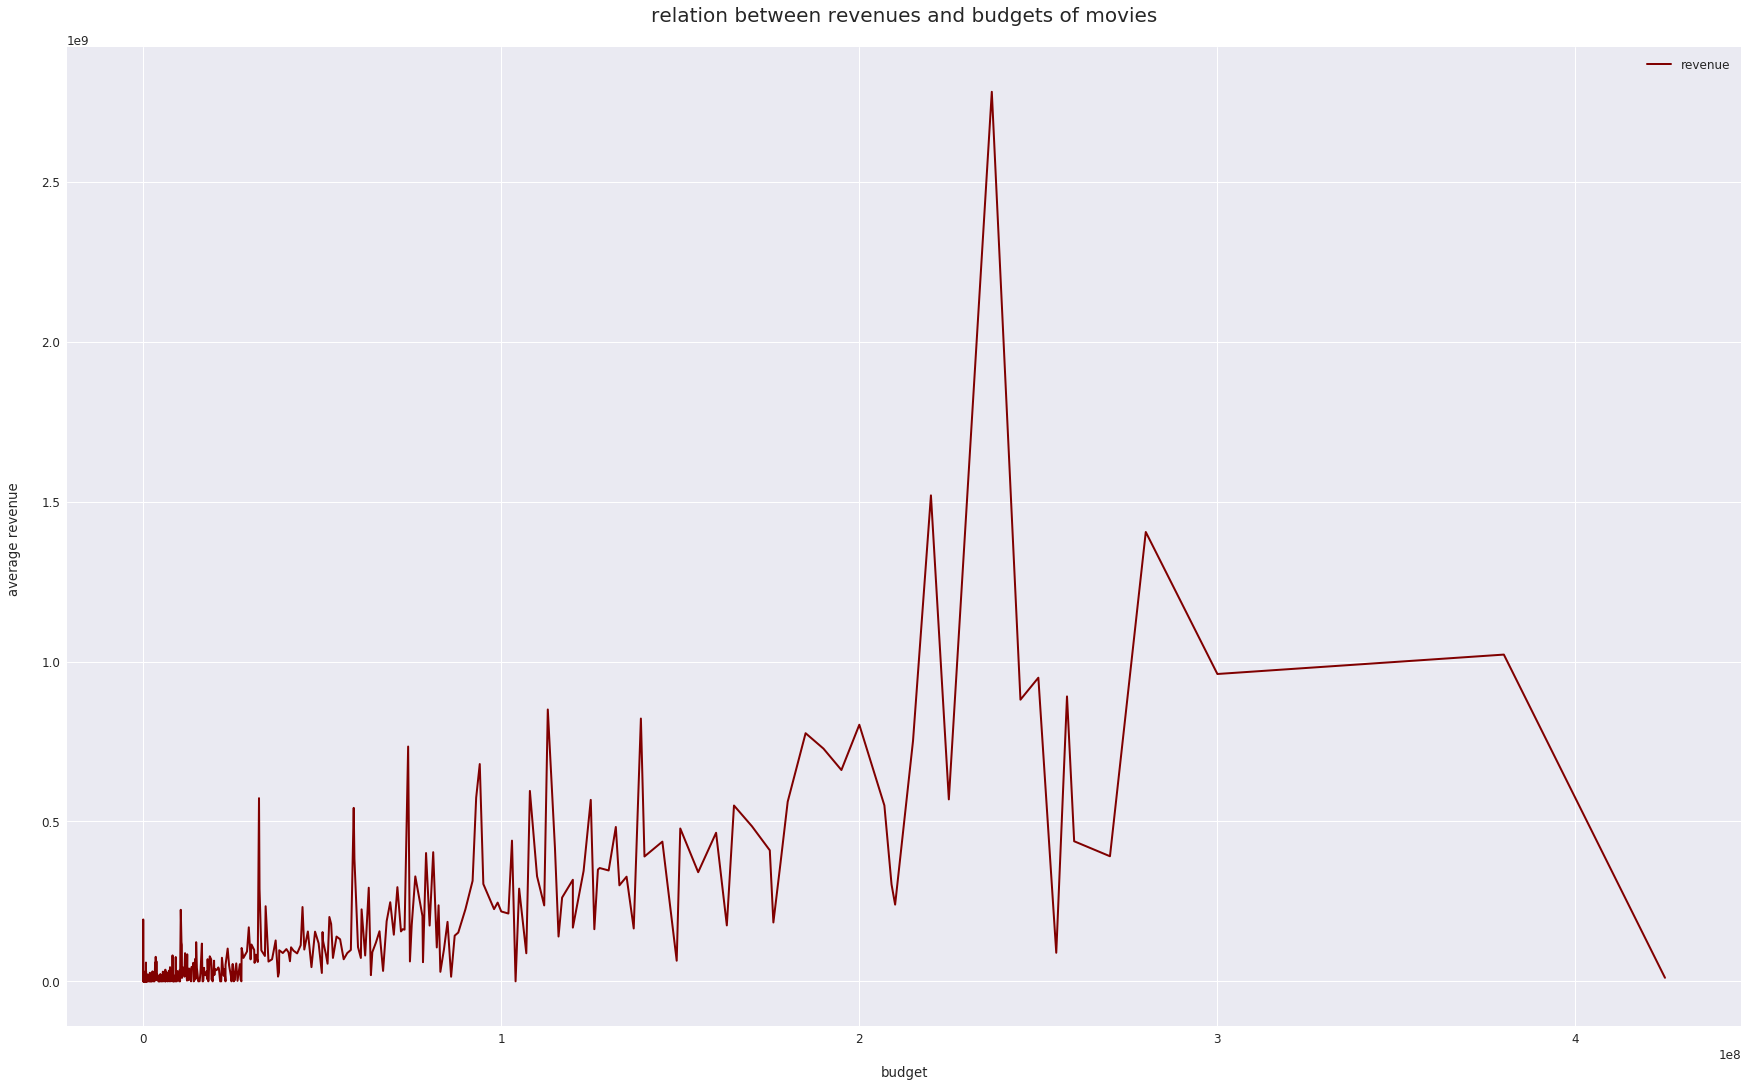

In [19]:
#relation between the budget and the revenue of movies 
avg_budget_vs_revenue =movie.groupby('budget').revenue.mean()  
sns.set(font_scale=1.2)
avg_budget_vs_revenue.plot(figsize=(30, 18), linewidth=2, color='maroon')
plt.xlabel("budget", labelpad=20)
plt.ylabel("average revenue ", labelpad=20)
plt.title("relation between revenues and budgets of movies", y=1.02, fontsize=20)
plt.legend()
plt.show();

##### From the (relation between revenues and budgets of movies) figure , it showes that it shouldn't the movie of high budget could be an indicator for  high revenue , modrete budget could have high revenue due to the cast in this movie or the genres of the movie 

In [20]:
#here is the code for understanding the above figure
movie.groupby('genres').revenue.mean().sort_values(ascending=True).iloc[[0,-1]]

genres
Drama|Science Fiction|Fantasy|Adventure     0.000000e+00
Action|Adventure|Science Fiction|Fantasy    2.068178e+09
Name: revenue, dtype: float64

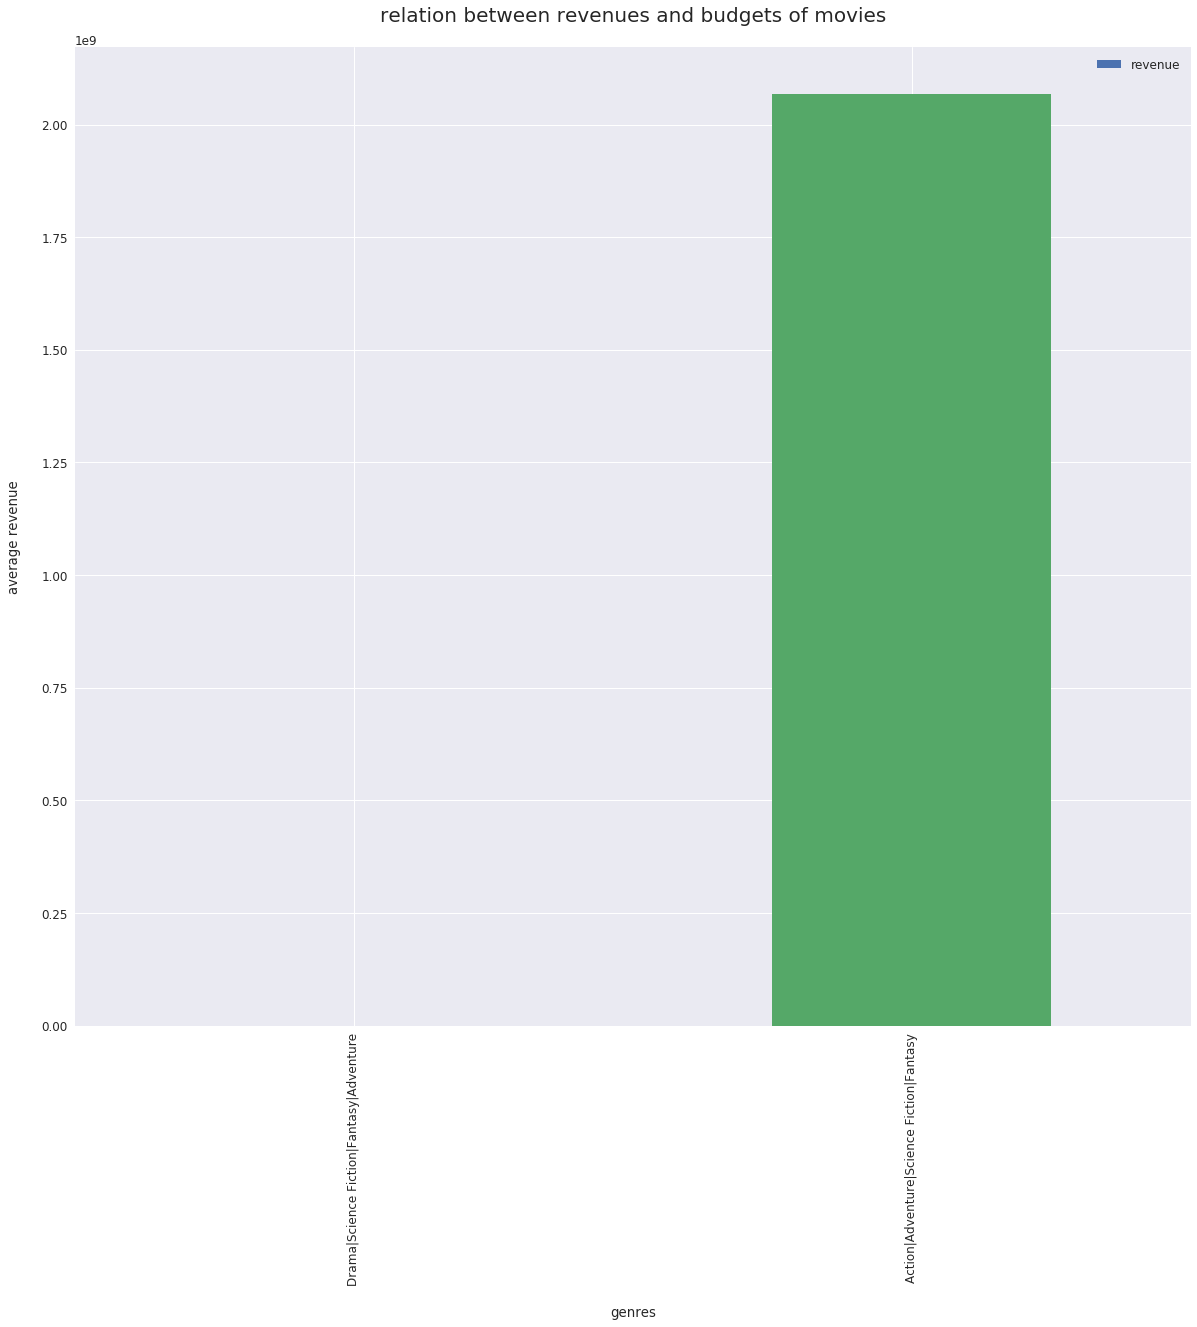

In [21]:
#relation between the genres of movies and the revenue 
d=movie.groupby('genres').revenue.mean().sort_values(ascending=True).iloc[[0,-1]]
d.plot(kind ='bar',figsize=(20,18))
plt.xlabel("genres", labelpad=20)
plt.ylabel("average revenue", labelpad=20)
plt.title("relation between revenues and budgets of movies", y=1.02, fontsize=20)
plt.legend()
plt.show;

##### From the figures below, the most movies that had high revenu were  their genres were (Action|Adventure|Science Fiction|Fantasy) with average revenue 2068178000 ,which means that genres have effect on increasing  of average revenue 

### Research Question 3  (Which movie had high revenue and movie had low revenue?)

In [22]:
#sort the dataframe by revenue and then choose revenue and original title columns
revenu_of_movies=movie.sort_values(by='revenue', ascending=False)
revenu_of_movies[['revenue','original_title']].iloc[[0,-1]]

,revenue,original_title
1386,2781505847,Avatar
10865,0,Manos: The Hands of Fate


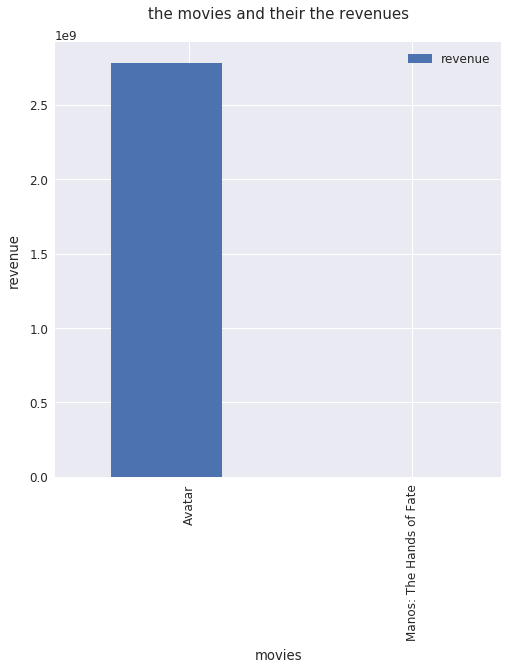

In [23]:
revenu_of_movies=movie.sort_values(by='revenue', ascending=False)
revofmovies=revenu_of_movies[['revenue','original_title']].iloc[[0,-1]]
width = 0.2 # width of the bar
ind = np.arange(len(revofmovies)) # x-axis ticks
locations = ind + width / 2  # xtick locations
labels=['Avatar','Manos: The Hands of Fate']  # xtick labels
revofmovies.plot(kind='bar',figsize=(8,8))
plt.xlabel("movies", labelpad=8)
plt.xticks(locations,labels)
plt.ylabel("revenue", labelpad=8)
plt.title("the movies and their the revenues", y=1.04, fontsize=15)
plt.legend()
plt.show();

##### From the below data it shows that the movie that had the highest revenue : 
1. movie name:Avatar
2. revenue:2781505847
3. budget:237000000
4. cast:Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez
5. director: James Cameron 
6. runtime: 2:42 
7. genres: Action|Adventure|Fantasy|Science Fiction  
8. release year: 2009

##### From the below data it shows that the movie that had the lowest revenue : 
There are some movies with zero revenue like: Manos: The Hands of Fate,The Mirror Has Two Faces,Up Close & Personal and
Gulliver's Travels

### Research Question 4  (Which movie consumed high budget and movie that consumed low budget?)

In [24]:
budget_to_movies=movie.sort_values(by='budget', ascending=False)
budgetofmovies=budget_to_movies[['original_title','budget']].iloc[[0,-1]]
budgetofmovies

,original_title,budget
2244,The Warrior's Way,425000000
1151,Fear Clinic,1


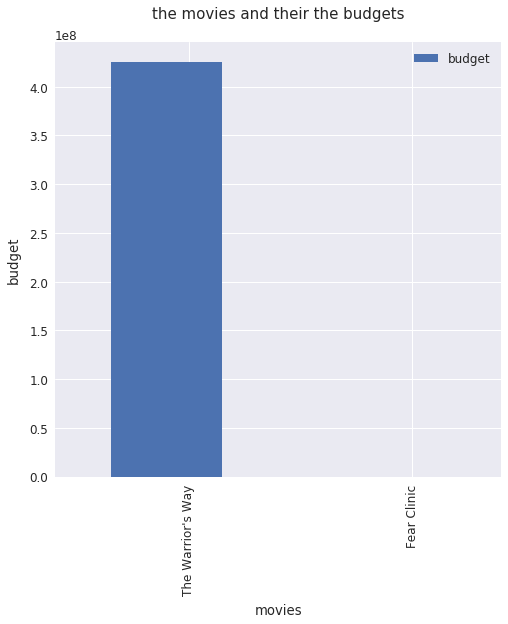

In [25]:
#sort the dataframe by budget and then choose budget and original title columns
budget_to_movies=movie.sort_values(by='budget', ascending=False)
budgetofmovies=budget_to_movies[['original_title','budget']].iloc[[0,-1]]
width = 0.2 # width of the bar
ind = np.arange(len(budgetofmovies)) # x-axis ticks
locations = ind + width / 2  # xtick locations
labels=['The Warrior\'s Way','Fear Clinic']  # xtick labels
budgetofmovies.plot(kind='bar',figsize=(8,8))
plt.xlabel("movies", labelpad=8)
plt.xticks(locations,labels)
plt.ylabel("budget", labelpad=8)
plt.title("the movies and their the budgets", y=1.04, fontsize=15)
plt.legend()
plt.show();

##### From the below data it shows that the movie that had the highest budget :
1. movie name:The Warrior's Way
2. revenue:11087569
3. budget:425000000
4. cast:Sam Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Danny Huston|Ti Lung
5. director: David Denneen
6. runtime: 1:40
7. genres: Adventure|Fantasy|Action|Western|Thriller	
8. release year: 2010

##### From the below data it shows that the movie that had the lowest budget :
There are many movies that have lowest budgetlike:Fear Clinic

### Research Question 5 (Which movie has the shortest runtime and which movie has the longest runtime ?) 

In [26]:
#sort the dataframe by runtime and then choose runtime and original title columns
longest_duration_movies=movie.sort_values(by='runtime',ascending=False)
longest_duration_movies[["original_title", "runtime"]].iloc[[0,-1]]

,original_title,runtime
2214,The Pacific,9h:0m
4836,Head Over Heels,0h:10m


##### The shortest movieis(Head Over Heel)with duration(0h:10m)while the longest duration movie is (The Pacific) with runtime(9h:0m)

### Research Question 6 (who is the  director who made more movies ?and how many movies?)

In [27]:
movie.director.value_counts().sort_values().iloc[[0,-1]]

Patrice Leconte      1
Steven Spielberg    29
Name: director, dtype: int64

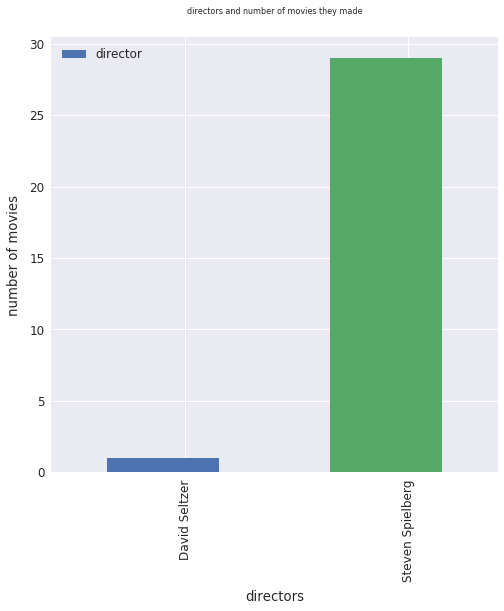

In [28]:
#get the numbers of movies made by each director 
movie_director=movie.director.value_counts().sort_values().iloc[[0,-1]]
width = 0.2 # width of the bar
ind = np.arange(len(movie_director)) # x-axis ticks
locations = ind + width / 2  # xtick locations
labels=['David Seltzer','Steven Spielberg']  # xtick labels
movie_director.plot(kind='bar',figsize=(8,8))
plt.xlabel("directors", labelpad=8)
plt.xticks(locations,labels)
plt.ylabel("number of movies", labelpad=8)
plt.title("directors and number of movies they made", y=1.04, fontsize=8)
plt.legend()
plt.show();


##### From the above data the director who have made more movies is(Steven Spielberg) with 29 movies

### Research Question 7 (Which movie has the highest vote and which movie has the lowest vote?)

In [29]:
vote=movie.sort_values(by='vote_average',ascending=False)
vote[["original_title", "vote_average"]].iloc[[0,-1]]

,original_title,vote_average
7948,Stop Making Sense,8.4
10865,Manos: The Hands of Fate,1.5


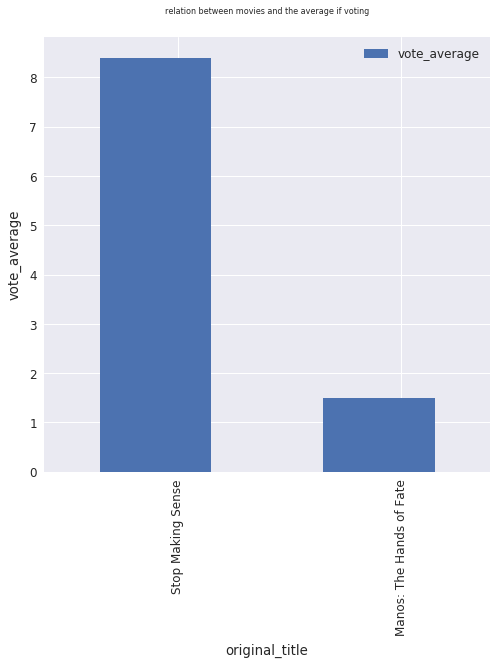

In [30]:
#sort the dataframe by vote_average and then choose vote_average and original title columns
vote=movie.sort_values(by='vote_average',ascending=False)
vot=vote[["original_title", "vote_average"]].iloc[[0,-1]]
width = 0.2 # width of the bar
ind = np.arange(len(vot)) # x-axis ticks
locations = ind + width / 2  # xtick locations
labels=['Stop Making Sense','Manos: The Hands of Fate']  # xtick labels
vot.plot(kind='bar',figsize=(8,8))
plt.xlabel("original_title", labelpad=8)
plt.xticks(locations,labels)
plt.ylabel("vote_average", labelpad=8)
plt.title("relation between movies and the average if voting", y=1.04, fontsize=8)
plt.legend()
plt.show();


##### The movie which has the higest vote is (Stop Making Sense	) with rate 8.4 while the lowest vote is for (Manos: The Hands of Fate) with rate(1.5) 

### Research Question 8 (Which year has  highest numbers of movies and which movie year has  highest numbers of movies?)


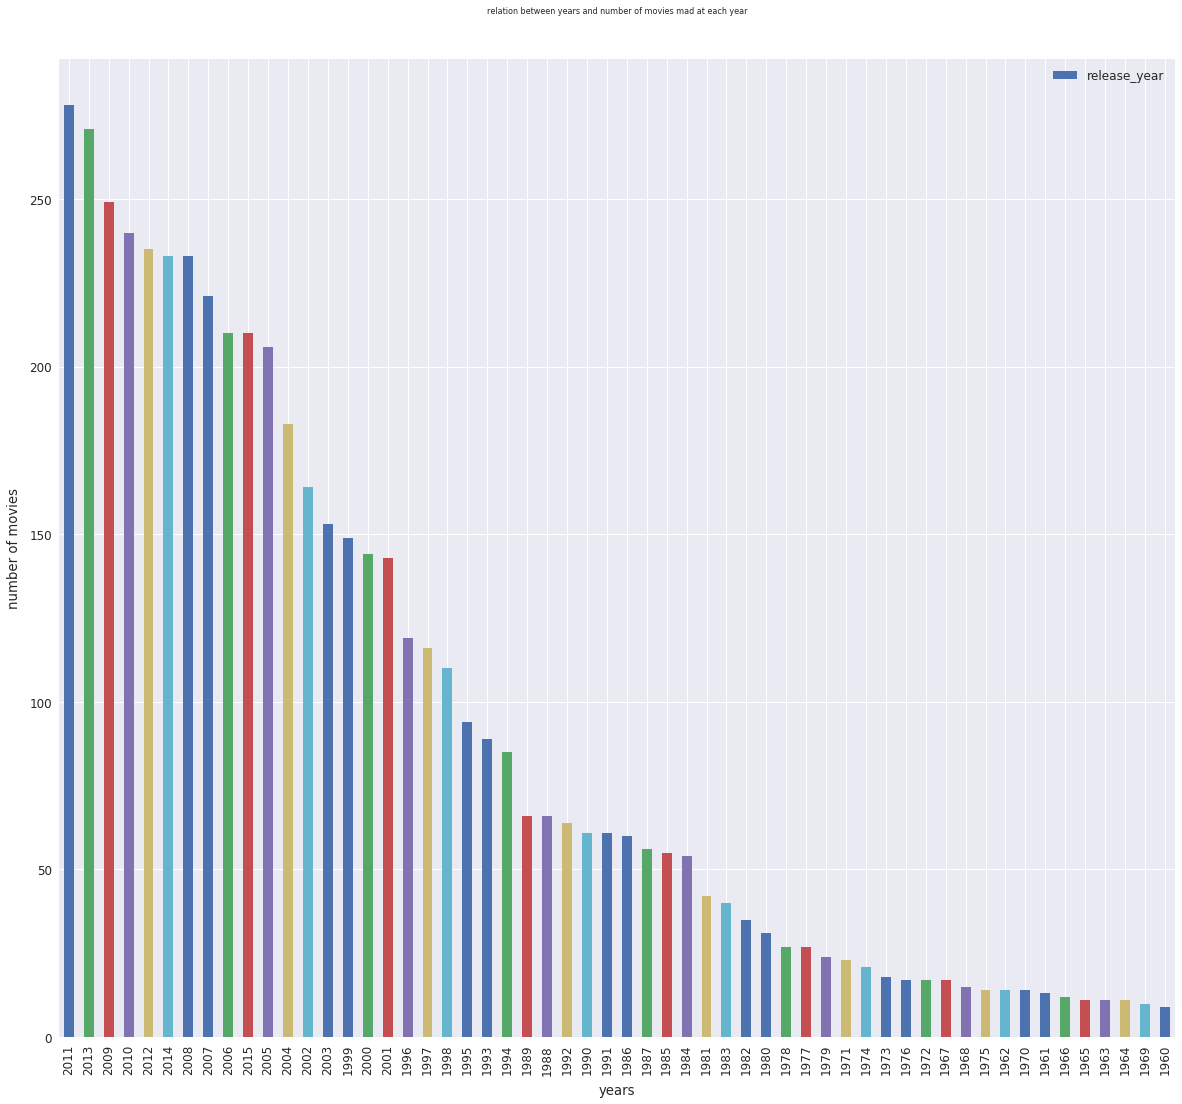

In [31]:
#get the number of movies made in each year 
movie.release_year.value_counts().plot.bar(figsize=(20,18))
plt.xlabel("years", labelpad=8)
plt.ylabel("number of movies", labelpad=8)
plt.title("relation between years and number of movies mad at each year", y=1.04, fontsize=8)
plt.legend()
plt.show();

##### From the below figure 2011 has more than  250 movies while 1960 has less than 50 movies.

### Research Question 9 (Is there strong relationship between fields of the datadet? )

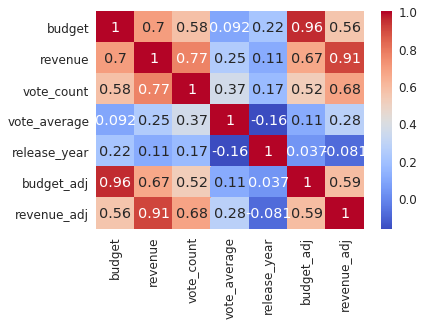

In [32]:
#check if there is strong relationship between fields of the datadet
movie.corr()
sns.heatmap(movie.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

##### Dark red means positive, Blue means negative. The stronger the color, the larger the correlation magnitude,hence we could clarify some corrlations in the data first of all is the corrletion between budget and revenue of the movies is tend to be positive corrletion which means that  the buget increase  may be an indicator for  the revenue might increase according to the value of corrletion 0.7 , another corrletion is between vote count and vote average which is tend to be negative corrletion which means that the increase in vote count may be an indicator for  the decrease in vote average accorrding to value of corrletion 0.37 ,the third corrletion is between the revenue and vote count which is tend to be postive corrletion accroding to corrletion value 0.77 which mean that the increase in vote count can be an indicator for the increase in revenue of the movies .

<a id='conclusions'></a>
## Conclusions

At the end, my conclution was the increase in the counts of votes could be an indicator for increase in revenue of movies,also the genres of movies could be affect in the increase of revenue of movies but overall there were not any fields in the dataest could conclude a strict information also there is no corrletion relationships between the fields of the dataset only approaches but **not 100% corrletion relationships**, I had some limitation which is dropping zero budegets,zero runtime movies and unused columns. 

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0